In [12]:
import pandas as pd

# Load the Excel file
file_path = 'FoodEnvironmentAtlas.xls'

# List of variables with corresponding sheet names and descriptive names
variables = {
    'Percent_change_fast_food_restaurants_2011_2016': ('RESTAURANTS', 'PCH_FFRPTH_11_16'),
    'Percent_change_convenience_stores_2011_2016': ('STORES', 'PCH_CONVSPTH_11_16'),
    'Metro_nonmetro_counties_2010': ('SOCIOECONOMIC', 'METRO13'),
    'Persistent_poverty_counties_2010': ('SOCIOECONOMIC', 'PERPOV10'),
    'Population_loss_counties_2010': ('SOCIOECONOMIC', 'POPLOSS10'),
    'Recreation_fitness_facilities_2011': ('HEALTH', 'RECFACPTH11'),
    'Grocery_stores_2011': ('STORES', 'GROCPTH11'),
    'Low_access_to_stores_2010': ('ACCESS', 'LACCESS_POP10'),
    'SNAP_authorized_stores_2012': ('ASSISTANCE', 'SNAPS12'),
    'SNAP_benefits_per_capita_2012': ('ASSISTANCE', 'PC_SNAPBEN12'),
    'WIC_redemptions_per_capita_2011': ('ASSISTANCE', 'PC_WIC_REDEMP11')
}

# Initialize a list to hold the dataframes
dfs = []

# Extract FIPS column separately to avoid duplication
fips_df = None

# Loop through the variables and extract data
for descriptive_name, (sheet, column) in variables.items():
    try:
        # Read the relevant sheet
        df = pd.read_excel(file_path, sheet_name=sheet)
        
        # Extract the FIPS column if not already extracted
        if fips_df is None:
            fips_df = df[['FIPS']]
        
        # Extract the relevant column and rename it
        dfs.append(df[['FIPS', column]].rename(columns={column: descriptive_name}))
        
        print(f"Successfully extracted {descriptive_name} from sheet {sheet}")
    except Exception as e:
        print(f"Failed to extract {descriptive_name} from sheet {sheet}: {e}")

# Concatenate all dataframes on FIPS
food_env_df = fips_df.copy()
for df in dfs:
    food_env_df = pd.merge(food_env_df, df, on='FIPS', how='left')

Successfully extracted Percent_change_fast_food_restaurants_2011_2016 from sheet RESTAURANTS
Successfully extracted Percent_change_convenience_stores_2011_2016 from sheet STORES
Successfully extracted Metro_nonmetro_counties_2010 from sheet SOCIOECONOMIC
Successfully extracted Persistent_poverty_counties_2010 from sheet SOCIOECONOMIC
Successfully extracted Population_loss_counties_2010 from sheet SOCIOECONOMIC
Successfully extracted Recreation_fitness_facilities_2011 from sheet HEALTH
Successfully extracted Grocery_stores_2011 from sheet STORES
Successfully extracted Low_access_to_stores_2010 from sheet ACCESS
Failed to extract SNAP_authorized_stores_2012 from sheet ASSISTANCE: "['SNAPS12'] not in index"
Successfully extracted SNAP_benefits_per_capita_2012 from sheet ASSISTANCE
Successfully extracted WIC_redemptions_per_capita_2011 from sheet ASSISTANCE


In [13]:


# Read the regression data
regression_data_path = 'regression_data_counties.csv'
regression_data = pd.read_csv(regression_data_path)

# Ensure FIPS is treated as a string in both DataFrames for a correct join
food_env_df['FIPS'] = food_env_df['FIPS'].astype(str)
regression_data['FIPS'] = regression_data['FIPS'].astype(str)


In [14]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FIPS                            3190 non-null   object 
 1   State_2011                      3190 non-null   object 
 2   County_2011                     3140 non-null   object 
 3   Rural_2011                      3189 non-null   float64
 4   Household Income_2011           3189 non-null   float64
 5   African American_2011           3190 non-null   float64
 6   Asian_2011                      3190 non-null   float64
 7   Hispanic_2011                   3190 non-null   float64
 8   Obese_2011                      3190 non-null   float64
 9   PCP Ratio_2011                  3190 non-null   object 
 10  change_rural                    3189 non-null   float64
 11  change_obese                    3190 non-null   float64
 12  change_binge_drinking           26

In [15]:
food_env_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FIPS                                            3143 non-null   object 
 1   Percent_change_fast_food_restaurants_2011_2016  3091 non-null   float64
 2   Percent_change_convenience_stores_2011_2016     3122 non-null   float64
 3   Metro_nonmetro_counties_2010                    3143 non-null   int64  
 4   Persistent_poverty_counties_2010                3143 non-null   int64  
 5   Population_loss_counties_2010                   3141 non-null   float64
 6   Recreation_fitness_facilities_2011              3143 non-null   float64
 7   Grocery_stores_2011                             3143 non-null   float64
 8   Low_access_to_stores_2010                       3143 non-null   float64
 9   SNAP_benefits_per_capita_2012            

In [22]:

# Merge the extracted food environment data with the regression data
merged_data = pd.merge(regression_data, food_env_df, on='FIPS', how='inner')

In [27]:
merged_data.head()

,FIPS,State_2011,County_2011,Rural_2011,Household Income_2011,African American_2011,Asian_2011,Hispanic_2011,Obese_2011,PCP Ratio_2011,...,Percent_change_fast_food_restaurants_2011_2016,Percent_change_convenience_stores_2011_2016,Metro_nonmetro_counties_2010,Persistent_poverty_counties_2010,Population_loss_counties_2010,Recreation_fitness_facilities_2011,Grocery_stores_2011,Low_access_to_stores_2010,SNAP_benefits_per_capita_2012,WIC_redemptions_per_capita_2011
0,55001,Wisconsin,Adams,100.0,38166.0,3.2,0.4,3.1,30.6,4057.0,...,15.450651,18.749241,0,0,0.0,0.048128,0.048128,3389.665147,20.174450,NaN
1,55003,Wisconsin,Ashland,53.5,39355.0,0.6,0.6,2.1,27.4,676.0,...,11.819228,11.042706,0,0,0.0,0.124805,0.499220,5073.500808,22.169613,27.775173
2,55005,Wisconsin,Barron,72.1,44522.0,0.4,0.5,1.5,28.6,951.0,...,4.846874,29.505306,0,0,0.0,0.087186,0.196168,3811.129087,17.118250,17.557281
3,55007,Wisconsin,Bayfield,100.0,42314.0,0.3,0.4,1.1,28.2,2982.0,...,-24.377510,-7.572512,0,0,0.0,0.132767,0.398301,3779.529282,11.325411,10.244596
4,55009,Wisconsin,Brown,16.1,53558.0,1.9,2.5,6.6,27.4,1302.0,...,6.160386,-7.779867,1,0,0.0,0.131723,0.115757,65132.862168,13.592221,16.366974


In [24]:

# Save to a CSV file if needed
merged_data.to_csv('merged_regression_data.csv', index=False)

print("Data extraction completed and saved to 'extracted_food_environment_data.csv'.")

Data extraction completed and saved to 'extracted_food_environment_data.csv'.


In [56]:
import pandas as pd
import statsmodels.api as sm

# Load the merged data
# merged_data = pd.read_csv('merged_regression_data.csv')

# Convert 'PCP Ratio_2011' to numeric by parsing the first part of the ratio
# merged_data['PCP Ratio_2011'] = merged_data['PCP Ratio_2011'].str.split(':').str[0].astype(float)

# Drop rows with any missing values in the specified columns
predictor_columns = [
    'Percent_change_fast_food_restaurants_2011_2016',
    'Percent_change_convenience_stores_2011_2016',
    'Metro_nonmetro_counties_2010',
    'African American_2011',
    'Asian_2011',
    'Hispanic_2011',
    'Persistent_poverty_counties_2010',
    'Population_loss_counties_2010',
    'Recreation_fitness_facilities_2011',
    'Grocery_stores_2011',
    'Low_access_to_stores_2010',
    'SNAP_benefits_per_capita_2012',
    'WIC_redemptions_per_capita_2011',
    'Household Income_2011',
    'Obese_2011',
    'PCP Ratio_2011',
    'Rural_2011',
    'change_rural'
]

response_columns = [
    'change_obese',
    'change_physical_inactivity',
    'change_mentally_unhealthy_days',
    'change_fair_poor_health'
]

# Drop rows with missing values in any of the predictor or response variables
# cleaned_data = merged_data.dropna(subset=predictor_columns + response_columns)

# # Add a constant term for the intercept in the regression
# X = cleaned_data[predictor_columns]
# X = sm.add_constant(X)

# # Loop over each response variable and perform a separate OLS regression
# for response in response_columns:
#     print(f"Running regression for response variable: {response}")
    
#     Y = cleaned_data[response]
    
#     # Fit the model
#     model = sm.OLS(Y, X).fit()
    
#     # Print the summary for each response variable
#     print(model.summary())
#     print("\n\n")  # Add space between summaries for readability


In [57]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_data = merged_data.dropna(subset=predictor_columns + response_columns)

# Add a constant term for the intercept in the regression
X = cleaned_data[predictor_columns]
X = sm.add_constant(X)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF) for each predictor:")
print(vif_data)

# Prepare for visualization
fig, axes = plt.subplots(len(response_columns), 1, figsize=(10, 20), constrained_layout=True)

# Loop over each response variable, perform the regression, and visualize the results
for i, response in enumerate(response_columns):
    print(f"Running regression for response variable: {response}")
    
    Y = cleaned_data[response]
    
    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Create a DataFrame for easy plotting
    results_df = pd.DataFrame({
        'Predictor': coeffs.index,
        'Coefficient': coeffs.values,
        'P-Value': pvals.values
    })
    
    # Plot the coefficients with p-values
    sns.barplot(x='Coefficient', y='Predictor', data=results_df, ax=axes[i], palette='coolwarm')
    
    # Highlight significant coefficients
    for j, p_value in enumerate(results_df['P-Value']):
        significance = '***' if p_value < 0.01 else ('**' if p_value < 0.05 else ('*' if p_value < 0.1 else ''))
        axes[i].text(results_df['Coefficient'][j], j, f'{significance}', 
                     color='black', ha="left", va="center")
    
    # Set title
    axes[i].set_title(f'Regression Coefficients for {response}')
    axes[i].axvline(0, color='black', linestyle='--', linewidth=1)

plt.show()


ValueError: zero-size array to reduction operation maximum which has no identity

Running regression for response variable: change_obese
Running regression for response variable: change_physical_inactivity


/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59074/1071955327.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Predictor', data=results_df, ax=axes[i], palette='coolwarm')
/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59074/1071955327.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Predictor', data=results_df, ax=axes[i], palette='coolwarm')


Running regression for response variable: change_mentally_unhealthy_days
Running regression for response variable: change_fair_poor_health


/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59074/1071955327.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Predictor', data=results_df, ax=axes[i], palette='coolwarm')
/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59074/1071955327.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Predictor', data=results_df, ax=axes[i], palette='coolwarm')


Coefficient of Percent_change_fast_food_restaurants_2011_2016 on change_obese: -0.0010522531659890475
Coefficient of Percent_change_fast_food_restaurants_2011_2016 on change_physical_inactivity: -0.008618555137329512
Coefficient of Percent_change_fast_food_restaurants_2011_2016 on change_mentally_unhealthy_days: -0.0002572750096671864
Coefficient of Percent_change_fast_food_restaurants_2011_2016 on change_fair_poor_health: -0.00016375993571767433


/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59074/2830753870.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fast_food_corr.values, y=fast_food_corr.index, palette='coolwarm')


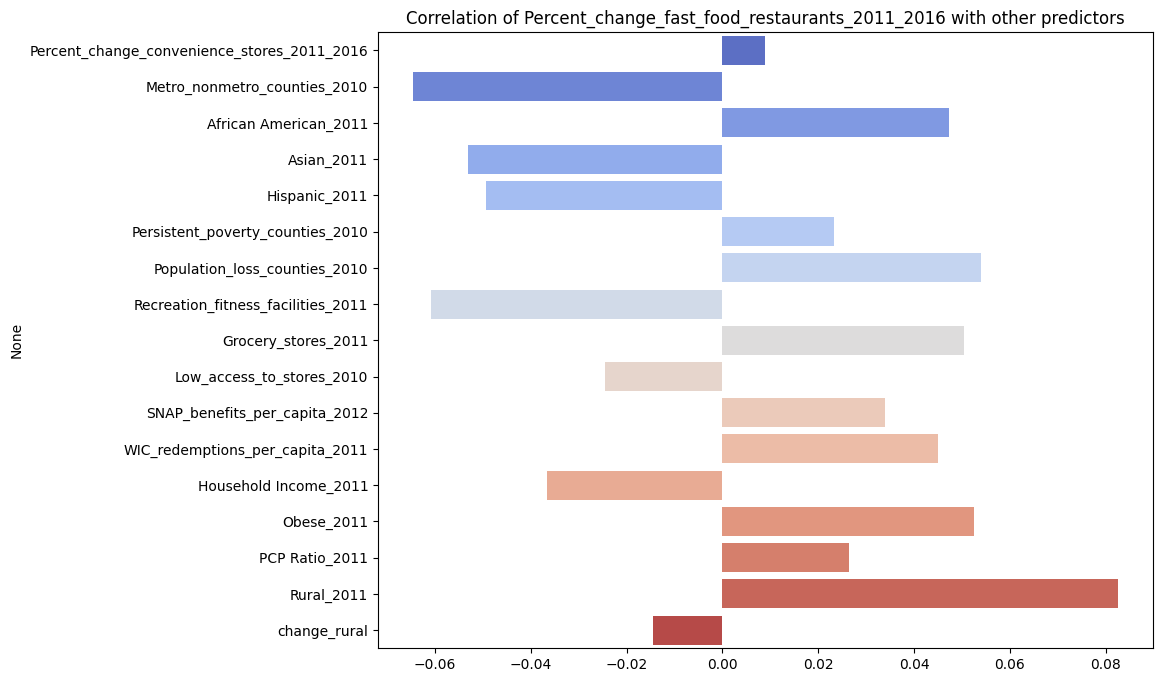

Correlation of Percent_change_fast_food_restaurants_2011_2016 with other predictors:
Percent_change_convenience_stores_2011_2016    0.008794
Metro_nonmetro_counties_2010                  -0.064504
African American_2011                          0.047239
Asian_2011                                    -0.053082
Hispanic_2011                                 -0.049260
Persistent_poverty_counties_2010               0.023377
Population_loss_counties_2010                  0.053863
Recreation_fitness_facilities_2011            -0.060885
Grocery_stores_2011                            0.050489
Low_access_to_stores_2010                     -0.024419
SNAP_benefits_per_capita_2012                  0.033875
WIC_redemptions_per_capita_2011                0.044960
Household Income_2011                         -0.036615
Obese_2011                                     0.052545
PCP Ratio_2011                                 0.026489
Rural_2011                                     0.082507
change_rural       

In [33]:
coefficients = {}

for response in response_columns:
    Y = cleaned_data[response]
    
    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Extract the coefficient for Percent_change_fast_food_restaurants_2011_2016
    coefficients[response] = model.params['Percent_change_fast_food_restaurants_2011_2016']
    print(f"Coefficient of Percent_change_fast_food_restaurants_2011_2016 on {response}: {coefficients[response]}")

# Step 2: Correlation Analysis
# Calculate correlations between Percent_change_fast_food_restaurants_2011_2016 and other predictors
correlations = cleaned_data[predictor_columns].corr()

# Extract correlations for Percent_change_fast_food_restaurants_2011_2016
fast_food_corr = correlations['Percent_change_fast_food_restaurants_2011_2016'].drop('Percent_change_fast_food_restaurants_2011_2016')

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=fast_food_corr.values, y=fast_food_corr.index, palette='coolwarm')
plt.title('Correlation of Percent_change_fast_food_restaurants_2011_2016 with other predictors')
plt.show()

# Display correlation values
print("Correlation of Percent_change_fast_food_restaurants_2011_2016 with other predictors:")
print(fast_food_corr)

Coefficient of Percent_change_convenience_stores_2011_2016 on change_obese: 0.005690721708301024
Coefficient of Percent_change_convenience_stores_2011_2016 on change_physical_inactivity: 0.0006064710247757638
Coefficient of Percent_change_convenience_stores_2011_2016 on change_mentally_unhealthy_days: 0.0008222755865580939
Coefficient of Percent_change_convenience_stores_2011_2016 on change_fair_poor_health: -0.0038439780206065643


/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59074/2683540201.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=convenience_stores_corr.values, y=convenience_stores_corr.index, palette='coolwarm')


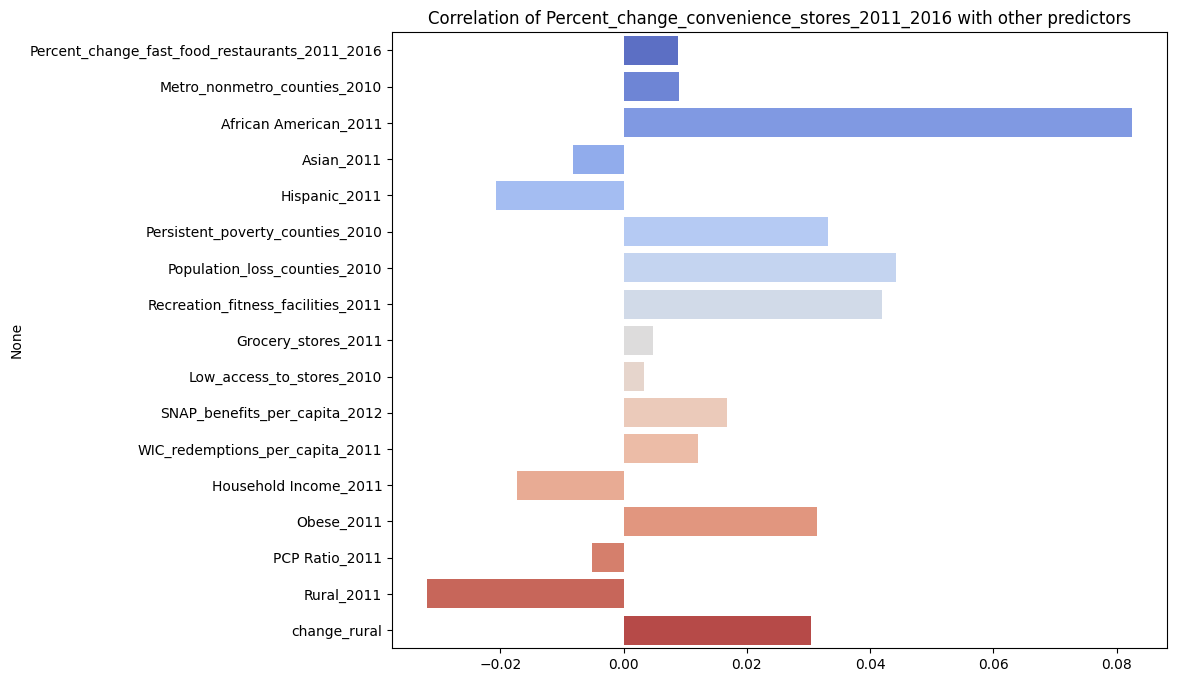

Correlation of Percent_change_convenience_stores_2011_2016 with other predictors:
Percent_change_fast_food_restaurants_2011_2016    0.008794
Metro_nonmetro_counties_2010                      0.008959
African American_2011                             0.082448
Asian_2011                                       -0.008204
Hispanic_2011                                    -0.020751
Persistent_poverty_counties_2010                  0.033239
Population_loss_counties_2010                     0.044241
Recreation_fitness_facilities_2011                0.041856
Grocery_stores_2011                               0.004844
Low_access_to_stores_2010                         0.003339
SNAP_benefits_per_capita_2012                     0.016804
WIC_redemptions_per_capita_2011                   0.012093
Household Income_2011                            -0.017257
Obese_2011                                        0.031408
PCP Ratio_2011                                   -0.005112
Rural_2011                       

In [34]:
coefficients = {}

# Loop over each response variable and extract the coefficient
for response in response_columns:
    Y = cleaned_data[response]
    
    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Extract the coefficient for Percent_change_convenience_stores_2011_2016
    coefficients[response] = model.params['Percent_change_convenience_stores_2011_2016']
    print(f"Coefficient of Percent_change_convenience_stores_2011_2016 on {response}: {coefficients[response]}")

# Step 2: Correlation Analysis
# Calculate correlations between Percent_change_convenience_stores_2011_2016 and other predictors
correlations = cleaned_data[predictor_columns].corr()

# Extract correlations for Percent_change_convenience_stores_2011_2016
convenience_stores_corr = correlations['Percent_change_convenience_stores_2011_2016'].drop('Percent_change_convenience_stores_2011_2016')

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=convenience_stores_corr.values, y=convenience_stores_corr.index, palette='coolwarm')
plt.title('Correlation of Percent_change_convenience_stores_2011_2016 with other predictors')
plt.show()

# Display correlation values
print("Correlation of Percent_change_convenience_stores_2011_2016 with other predictors:")
print(convenience_stores_corr)

In [35]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
merged_data = pd.read_csv('merged_regression_data.csv')

# Prepare the data for Granger Causality Test
# Ensure that the time series data is stationary and appropriately lagged
# For simplicity, we'll assume one lag and work with key variables

variables = [
    'Percent_change_fast_food_restaurants_2011_2016',
    'Percent_change_convenience_stores_2011_2016',
    'change_obese',
    'change_physical_inactivity',
    'change_mentally_unhealthy_days',
    'change_fair_poor_health'
]

# Filter the data to remove missing values
filtered_data = merged_data[variables].dropna()

# Perform Granger Causality test
max_lag = 1  # Define the number of lags
test_result = grangercausalitytests(filtered_data[['change_obese', 'Percent_change_fast_food_restaurants_2011_2016']], max_lag)

# Print the results
print("Granger Causality Test Results between change_obese and Percent_change_fast_food_restaurants_2011_2016:")
print(test_result)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6793  , p=0.1951  , df_denom=2679, df_num=1
ssr based chi2 test:   chi2=1.6812  , p=0.1948  , df=1
likelihood ratio test: chi2=1.6807  , p=0.1948  , df=1
parameter F test:         F=1.6793  , p=0.1951  , df_denom=2679, df_num=1
Granger Causality Test Results between change_obese and Percent_change_fast_food_restaurants_2011_2016:
{np.int64(1): ({'ssr_ftest': (np.float64(1.6793301478796288), np.float64(0.19512511801887078), np.float64(2679.0), np.int64(1)), 'ssr_chi2test': (np.float64(1.6812106967574336), np.float64(0.1947636570540179), np.int64(1)), 'lrtest': (np.float64(1.6806839837099687), np.float64(0.19483359196319933), np.int64(1)), 'params_ftest': (np.float64(1.679330147878755), np.float64(0.1951251180190396), np.float64(2679.0), 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x155bc7a90>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1554d0c90>

In [41]:
coefficients = {}

# Loop over each response variable and extract the coefficient
for response in response_columns:
    Y = cleaned_data[response]
    
    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Extract the coefficient for Percent_change_fast_food_restaurants_2011_2016
    coefficients[response] = model.params['Percent_change_fast_food_restaurants_2011_2016']

# Define the desired increase in fast-food restaurants
desired_increase = 20  # This represents a 10% increase

# Calculate the predicted change in each response variable
predicted_changes = {response: coeff * desired_increase for response, coeff in coefficients.items()}

# Print the predicted changes
for response, change in predicted_changes.items():
    print(f"Predicted change in {response} for a 10% increase in fast-food restaurants: {change}")

Predicted change in change_obese for a 10% increase in fast-food restaurants: -0.02104506331978095
Predicted change in change_physical_inactivity for a 10% increase in fast-food restaurants: -0.17237110274659023
Predicted change in change_mentally_unhealthy_days for a 10% increase in fast-food restaurants: -0.005145500193343727
Predicted change in change_fair_poor_health for a 10% increase in fast-food restaurants: -0.0032751987143534865


In [45]:
merged_data.head()

,FIPS,State_2011,County_2011,Rural_2011,Household Income_2011,African American_2011,Asian_2011,Hispanic_2011,Obese_2011,PCP Ratio_2011,...,Percent_change_fast_food_restaurants_2011_2016,Percent_change_convenience_stores_2011_2016,Metro_nonmetro_counties_2010,Persistent_poverty_counties_2010,Population_loss_counties_2010,Recreation_fitness_facilities_2011,Grocery_stores_2011,Low_access_to_stores_2010,SNAP_benefits_per_capita_2012,WIC_redemptions_per_capita_2011
0,55001,Wisconsin,Adams,100.0,38166.0,3.2,0.4,3.1,30.6,NaN,...,15.450651,18.749241,0,0,0.0,0.048128,0.048128,3389.665147,20.174450,NaN
1,55003,Wisconsin,Ashland,53.5,39355.0,0.6,0.6,2.1,27.4,NaN,...,11.819228,11.042706,0,0,0.0,0.124805,0.499220,5073.500808,22.169613,27.775173
2,55005,Wisconsin,Barron,72.1,44522.0,0.4,0.5,1.5,28.6,NaN,...,4.846874,29.505306,0,0,0.0,0.087186,0.196168,3811.129087,17.118250,17.557281
3,55007,Wisconsin,Bayfield,100.0,42314.0,0.3,0.4,1.1,28.2,NaN,...,-24.377510,-7.572512,0,0,0.0,0.132767,0.398301,3779.529282,11.325411,10.244596
4,55009,Wisconsin,Brown,16.1,53558.0,1.9,2.5,6.6,27.4,NaN,...,6.160386,-7.779867,1,0,0.0,0.131723,0.115757,65132.862168,13.592221,16.366974


In [49]:


# Filter data to include only rural counties where Rural_2011 > 90%
rural_data = merged_data[merged_data['Rural_2011'] > 95]

# Drop rows with any missing values in the specified columns for rural data


rural_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 3132
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FIPS                                            755 non-null    int64  
 1   State_2011                                      755 non-null    object 
 2   County_2011                                     755 non-null    object 
 3   Rural_2011                                      755 non-null    float64
 4   Household Income_2011                           754 non-null    float64
 5   African American_2011                           755 non-null    float64
 6   Asian_2011                                      755 non-null    float64
 7   Hispanic_2011                                   755 non-null    float64
 8   Obese_2011                                      755 non-null    float64
 9   PCP Ratio_2011                                 

In [ ]:
# Add a constant term for the intercept in the regression
X_rural = cleaned_rural_data[predictor_columns]
X_rural = sm.add_constant(X_rural)

In [51]:
import pandas as pd
import statsmodels.api as sm

# Load the merged data
# merged_data = pd.read_csv('merged_regression_data.csv')

# Convert 'PCP Ratio_2011' to numeric by parsing the first part of the ratio
# No need to do this anymore as we're not using 'PCP Ratio_2011'
# merged_data['PCP Ratio_2011'] = merged_data['PCP Ratio_2011'].str.split(':').str[0].astype(float)

# Define the predictor and response variables, excluding 'WIC_redemptions_per_capita_2011' and 'PCP Ratio_2011'
predictor_columns = [
    'Percent_change_fast_food_restaurants_2011_2016',
    'Percent_change_convenience_stores_2011_2016',
    'Metro_nonmetro_counties_2010',
    'African American_2011',
    'Asian_2011',
    'Hispanic_2011',
    'Persistent_poverty_counties_2010',
    'Population_loss_counties_2010',
    'Recreation_fitness_facilities_2011',
    'Grocery_stores_2011',
    'Low_access_to_stores_2010',
    'SNAP_benefits_per_capita_2012',
    'Household Income_2011',
    'Obese_2011',
    'Rural_2011',
    'change_rural'
]

response_columns = [
    'change_obese',
    'change_physical_inactivity',
    'change_mentally_unhealthy_days',
    'change_fair_poor_health'
]

# Convert all relevant columns to numeric, coercing errors
for col in predictor_columns + response_columns:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Filter data to include only rural counties where Rural_2011 > 90%
rural_data = merged_data[merged_data['Rural_2011'] > 90]

# Drop rows with any missing values in the specified columns for rural data
cleaned_rural_data = rural_data.dropna(subset=predictor_columns + response_columns)

# Add a constant term for the intercept in the regression
X_rural = cleaned_rural_data[predictor_columns]
X_rural = sm.add_constant(X_rural)

# Prepare to collect coefficients for Percent_change_fast_food_restaurants_2011_2016 in rural counties
coefficients_rural = {}

# Loop over each response variable and extract the coefficient for rural data
for response in response_columns:
    Y_rural = cleaned_rural_data[response]
    
    # Fit the model
    model_rural = sm.OLS(Y_rural, X_rural).fit()
    
    # Extract the coefficient for Percent_change_fast_food_restaurants_2011_2016
    coefficients_rural[response] = model_rural.params['Percent_change_fast_food_restaurants_2011_2016']

# Define the desired increase in fast-food restaurants for rural areas
desired_increase_rural = 20  # This represents a 20% increase

# Calculate the predicted change in each response variable for rural data
predicted_changes_rural = {response: coeff * desired_increase_rural for response, coeff in coefficients_rural.items()}

# Print the predicted changes for rural counties
print("\nPredicted changes in rural counties (Rural_2011 > 90%):")
for response, change in predicted_changes_rural.items():
    print(f"Predicted change in {response} for a 20% increase in fast-food restaurants in rural counties: {change}")



Predicted changes in rural counties (Rural_2011 > 90%):
Predicted change in change_obese for a 20% increase in fast-food restaurants in rural counties: 0.032307546375761526
Predicted change in change_physical_inactivity for a 20% increase in fast-food restaurants in rural counties: -0.03264720242942116
Predicted change in change_mentally_unhealthy_days for a 20% increase in fast-food restaurants in rural counties: -0.012491065092838606
Predicted change in change_fair_poor_health for a 20% increase in fast-food restaurants in rural counties: 0.07593940654710285
